<center><strong><big>Feuille TP Python MAP361</big></strong></center>

Le document que vous êtes en train de lire est un _notebook_ (un fichier d'extension "_.ipynb_"). Ce fichier est interprété par un programme appelé [jupyter](https://jupyter.org/) qui s'execute dans un navigateur web. Un notebook contient des cellules qui peuvent être:
- **Markdown**: contient du texte au format html ou au format [markdown](https://www.markdownguide.org/) qui permet d'écrire brièvement du texte formaté et aussi des mathématiques $e^{i \pi} = -1$ (grâce à la syntaxe [LaTeX](https://www.latex-project.org/) et à l'interpéteur [mathjax](https://www.mathjax.org/))
- **Code**: contient du code, ici du python3 car le [kernel](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels) est un interpréteur python3 (mais on pourrait utiliser un kernel pour un autre langage: R, Julia, bash, et même du C++)
- **Raw**: des instructions non interprétées par jupyter

On peut éditer une cellule en double-cliquant dessus, puis l'executer en faisant la combinaison **Shift+Enter**. L'application jupyter a plusieurs menus qui permettent d'ajouter une cellule, de changer son type (Markdown/Code/Raw), de manipuler des cellules (copier/coller/suppression/fusion...), d'agir sur le kernel: interruption du code, redémarrage du kernel...

Chaque cellule de code qui est executé possède un numéro. Ce numéro est important car il permet de suivre la séquence d'execution des cellules. L'execution d'une cellule peut dépendre de variables définies dans des cellules déjà executées: le contexte est global. Par exemple la variable `x` est définie et initialisée après l'execution de cette cellule (à executer):

In [1]:
x = 0     # x sera accessible dans les cellules suivantes

Une cellule de code doit contenir du code compatible avec le kernel utilisé. Les erreurs de syntaxe ou d'execution apparaissent en rouge à l'execution de la cellule. Voici un exemple (à executer):

In [2]:
y = 1 / x
print(y)

ZeroDivisionError: division by zero

---

Dans toute cette feuille on utilise les librairies suivantes qui sont à connaitre pour une bonne utilisation du langage python comme langage de programmation scientifique. La documentation officielle est parfaite pour apprendre à utiliser au mieux ces librairies. Voici les liens
- [numpy](https://www.numpy.org/devdocs/user/index.html)
- [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html)
- [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [matplotlib](https://matplotlib.org/contents.html)
- [pandas](http://pandas.pydata.org/pandas-docs/stable/)

La cellule de code suivante fait les `import` nécessaire au code de cette feuille. On utilisera donc les abbréviations `np`, `npr`, `sps` et `plt` pour accéder à ces librairies.

In [33]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
np.mean?

Dans les cellules de codes (python) d'un notebook jupyter on a aussi la possibilité d'accéder à des commandes [magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html) qui sont précédées du symbole `%` ou `%%`. Par exemple dans la cellule ci-dessous on appelle la magic [%matplotlib](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib). Une autre commande qu'on utilisera dans ce TP (et qui est utile pour apprendre à programmer efficacement) est [%timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit).

In [5]:
%matplotlib inline
%config InlineBackend.figure_format ='retina' # pour avoir une résolution double sur un écran Retina (macbook)

# Simulation et représentation de lois de probabilité

## Lois discrètes
Pour simuler une loi discrète donnée par un vecteur $p \in [0,1]^d$ tel que $\sum_k p_k = 1$ on peut au choix: 
- utiliser la fonction `np.random.choice` 
- utiliser la classe `scipy.stats.rv_discrete` et sa méthode `rvs` associée 

On considère la variable aléatoire $X$ sur $E = \{0, 1, 2, 3, 4, 5, 6 \}$ de loi donnée par $\mathbf{P}[X = k] = p_k$
$$
    p = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
$$

><b><big>Q</big>1.</b> Créer un `np.array` `sample` qui contient `N = 200` réalisations indépendantes de la variable aléatoire $X$ (on parle aussi d'un échantillon _i.i.d._ de même loi que $X$). Dans la suite le tableau `sample` contient $(X_1,\dots,X_N)$.


In [44]:
rv_1 = sps.rv_discrete(values= values)

In [58]:
Array  = np.random.choice(a= [0,1,2,3,4,5,6], size = 200, p = p)
print(Array)

[1 6 1 1 2 4 2 0 6 3 1 4 4 2 2 6 2 3 2 1 2 1 2 6 6 6 6 4 4 6 1 4 1 6 1 2 6
 2 1 6 0 2 0 6 6 2 2 6 3 1 1 6 3 6 6 0 6 6 1 6 0 3 6 6 3 0 1 4 1 2 2 0 4 1
 0 2 0 1 2 4 6 3 6 1 2 4 0 2 2 3 1 4 2 1 2 4 2 0 3 0 6 6 0 3 4 1 2 2 3 4 3
 2 2 1 6 1 2 0 4 4 2 6 1 6 4 2 3 3 4 6 3 6 0 6 1 0 2 1 3 2 2 2 1 3 1 2 0 6
 3 2 2 6 4 1 1 1 2 2 3 6 0 6 2 4 4 1 4 6 4 2 0 3 2 2 6 3 4 1 2 6 6 3 6 2 6
 2 3 4 1 1 0 2 6 0 6 1 1 2 0 3]


><b><big>Q</big>2.</b> A l'aide de la fonction `numpy.bincount` données les proportions empiriques de `sample`, c'est à dire les quantités $$\frac{1}{N} \sum_{i=1}^N \mathbf{1}_{X_i = k}$$ pour tout $k \in E$. On peut aussi utiliser la fonction `np.histogram` mais en faisant attention aux arguments optionnels, notamment l'argument `bins` (on utilisera cette fonction pour les lois à densité).

In [65]:
count = np.bincount(Array)
print(np.histogram(Array))

(array([22, 37,  0, 48,  0, 24, 25,  0,  0, 44]), array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]))


><b><big>Q</big>3.</b> En utilisant la fonction `plt.bar` et les options `edgecolor = "black", color = "red", width = 0.5, alpha = 0.2`, ainsi que la fonction `plt.stem` (ou bien la combinaison des fonctions `plot` et `vlines`), réaliser le tracé suivant:
:![](discrete.png):

In [64]:
plt.bar?

<Container object of 7 artists>

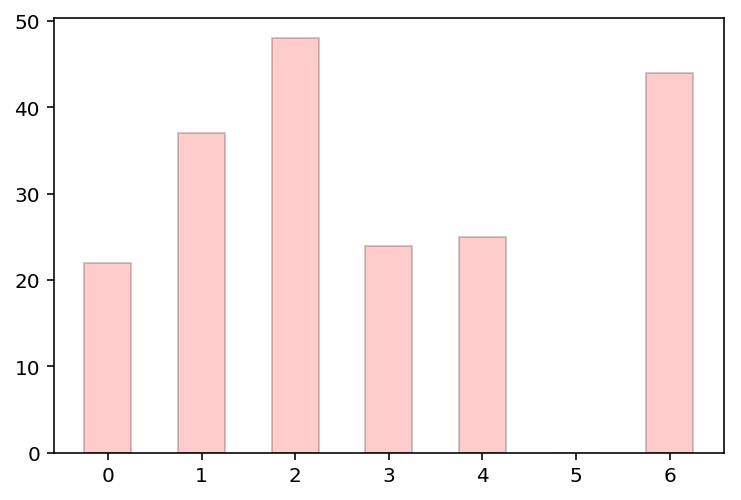

In [66]:
plt.bar(left = [0,1,2,3,4,5,6], height= count, edgecolor = "black", color = "red", width = 0.5, alpha = 0.2)

><b><big>Q</big>4.</b> Tracer ce graphe pour plusieurs échantillons, puis augmenter la taille de l'échantillon. Que remarque-t-on ?

In [112]:
def draw_echantillions(n,X,p):
    Array  = np.random.choice(a = X, size = n, p = p)
    count = np.bincount(Array, minlength= len(X))/n
    plot = plt.bar(left = X, height= count, edgecolor = "black", color = "red", width = 0.5, alpha = 0.2);
    return count

array([ 0.10132,  0.19929,  0.30044,  0.09951,  0.10009,  0.     ,  0.19935])

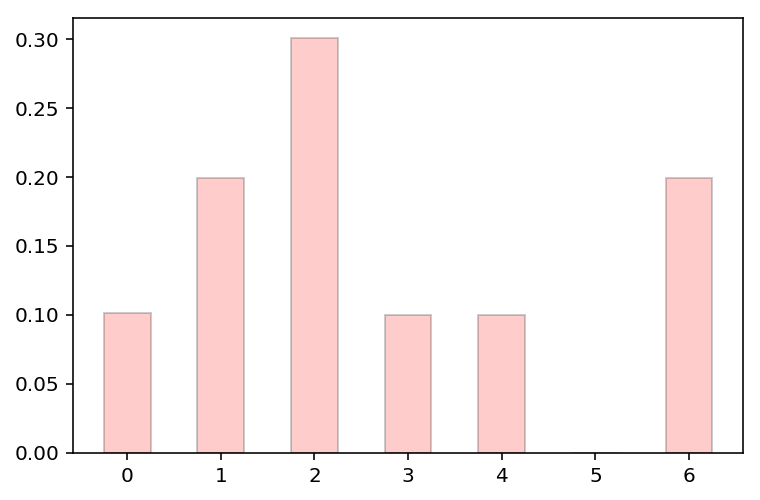

In [77]:
draw_echantillions(100000)

La frequence de chaque element de [0,1,2,3,4,5,6] tends vers la probablilite $p_k$

><b><big>Q</big>5.</b> Représenter l'erreur en variation totale $E_N$ entre la loi de X et la loi empirique d'un échantillon en fonction de la taille $N$ (faire varier `N` de 100 à 40000 par pas de 100 en utilisant `np.arange`). On rappelle que l'erreur en variation totale entre 2 lois s'exprime comme la moitié de la norme $\mathbb{L}^1$ entre les vecteurs $(\mu(x))_{x \in E}$ et $(\nu(x))_{x \in E}$ c'est à dire
$$
    \| \mu - \nu \|_{TV} = \frac{1}{2} \sum_{x \in E} |\mu(x) - \nu(x)|.
$$
Faire aussi le graphe de $\sqrt{N} \times E_N$ en fonction de $N$. Que cela suggère-t-il sur le comportement théorique de l'erreur ? 

In [115]:
def get_erreur_echantillions(n,X,P):
    Array  = np.random.choice(a= X, size = n, p = p)
    count = np.bincount(Array, minlength= len(X))/n
    error = np.sum(np.abs(count - p))
    return error

In [80]:
error = [];
for i in range(100, 40001, 100):
    error.append(get_erreur_echantillions(i))

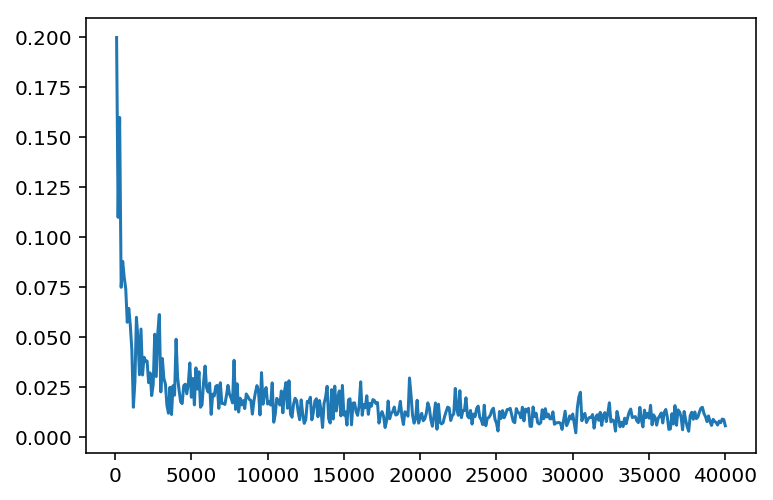

In [82]:
N = range(100, 40001, 100)
plt.plot(N,error)

In [83]:
# Draw the E_n * sqrt(N)
E_n = np.sqrt(N) * error

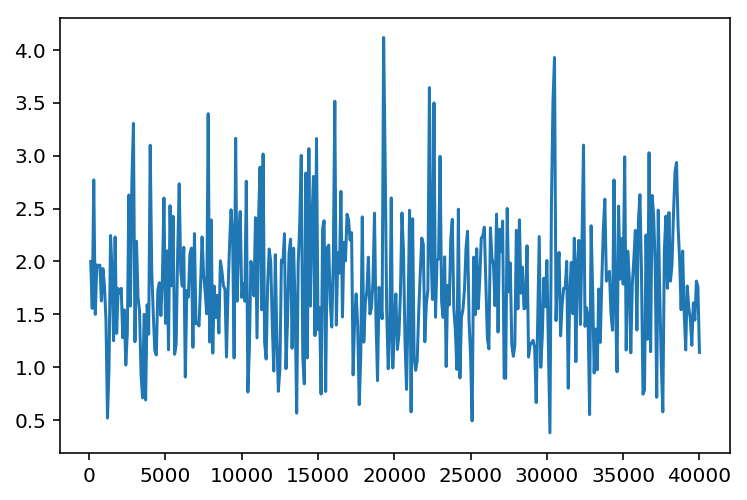

In [85]:
plt.plot(N, E_n)

><b><big>Q</big>6.</b> On considère maintenant la loi binomiale de paramètres $n = 20, p = 0.4$. Faire le graphe qui compare la loi empirique et la loi théorique avec cette loi discrète. Il est conseillé d'utiliser `sps.binom` et la méthode `pmf` pour récupérer la fonction de masse $p(k) = \binom{n}{k} p^k (1-p)^{n-k}$.

In [86]:
sps.rv_discrete?

In [ ]:
fact

In [94]:
def binomial_p(k,n,p):
    return math.factorial(n)/(math.factorial(k) * math.factorial(n-k))*pow(p,k)*pow(1-p,n-k)

In [95]:
for i in range(20):
    print(binomial_p(i,20,0.4))

3.6561584400629733e-05
0.00048748779200839646
0.003087422682719845
0.012349690730879381
0.03499079040415825
0.07464701952887093
0.1244116992147849
0.1658822656197132
0.17970578775468934
0.15973847800416832
0.1171415505363901
0.0709948791129637
0.035497439556481845
0.014563052125736147
0.004854350708578716
0.0012944935222876579
0.0002696861504765954
4.230370987868164e-05
4.700412208742405e-06
3.298534883328003e-07


In [99]:
X = range(20)
p = [binomial_p(i,20,0.4) for i in range(20)]

In [107]:
len(p)

20

array([  5.00000000e-05,   4.60000000e-04,   3.09000000e-03,
         1.23300000e-02,   3.56100000e-02,   7.37100000e-02,
         1.24030000e-01,   1.66740000e-01,   1.78030000e-01,
         1.61580000e-01,   1.15820000e-01,   7.12600000e-02,
         3.67700000e-02,   1.43500000e-02,   4.55000000e-03,
         1.36000000e-03,   2.50000000e-04,   1.00000000e-05,
         0.00000000e+00,   0.00000000e+00])

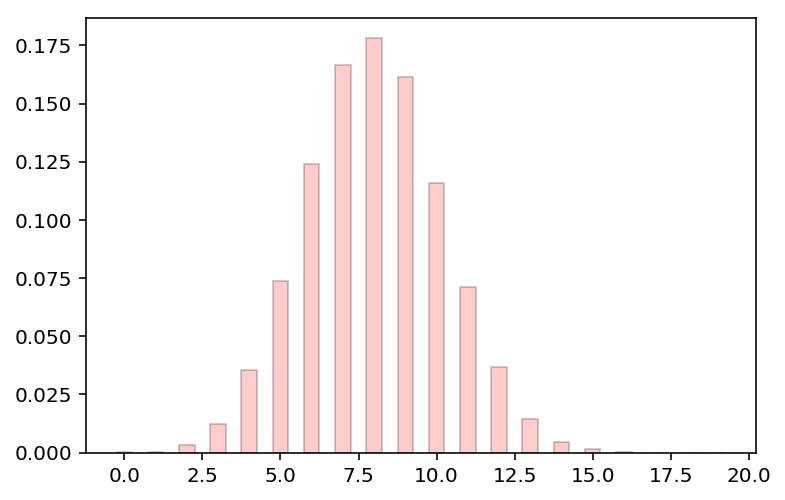

In [114]:
draw_echantillions(100000, X, p)

In [117]:
get_erreur_echantillions(100000,X,p)

0.0071036937949893195

## Lois à densité
On se propose d’identifier la loi d’une variable aléatoire $X$ en traçant l’histogramme d’échantillon $(X_1, \dots, X_N)$ de réalisations indépendantes de $X$ et en le comparant à la densité supposée de $X$. On rappelle qu’un histogramme d’un échantillon est un diagramme en colonnes exprimant la répartition des valeurs de cet échantillon dans divers intervalles (la renormalisation est faite de façon à ce que l’aire totale vaille 1). 

On peut construire un histogramme à l'aide de la fonction `np.histogram` ou bien le construire et le tracer en utilisant `plt.hist`. Le paramètre optionnel `bins` est soit le nombre de colonnes (que l'on peut choisir automatiquement à $N^{1/3}$ dans un premier temps), soit le vecteur des abscisses (ordonnées dans l’ordre croissant) des bases des colonnes.

><b><big>Q</big>1.</b> Soient $X$ et $Y$ des variables aléatoires de loi uniforme sur $[−1, 1]$ indépendantes. Illustrer,
via un histogramme, le fait que $X+Y$ a pour densité $q(x) = \frac{1}{4} \max \bigl(2 − |x|, 0\bigr)$.

In [124]:
X = sps.uniform(0,1)
Y = sps.uniform(0,1)

In [135]:
plt.hist?

In [130]:
a_x = np.array(X.rvs(10000))
a_y = np.array(Y.rvs(10000))

In [131]:
a_z = []
for i in range(len(a_x)):
    a_z.append(a_x[i] + a_y[i])
print(a_z)

[1.4491656634083827, 1.6989210148820399, 1.2263981907606267, 0.91908575724784969, 1.2033959980725646, 1.5795811274717337, 1.2486367636381501, 1.2877738371105965, 1.3212611205531997, 1.00921313432052, 0.87946205659942811, 1.6163316463265769, 0.56651492363812006, 0.96018691766808917, 0.8016532585863837, 1.4880045573772931, 1.4223386644513067, 0.34146999072516759, 1.6783905262977585, 0.54379841493785142, 1.2009041598045469, 1.8189616869467202, 1.2144277752787038, 0.95282067707261531, 1.3851566424274111, 0.58827462727798019, 1.3183517198779942, 1.1989859246764996, 0.8350344090416737, 1.1350510873353621, 1.0704354621836314, 1.0882691882202731, 1.7128608086859856, 1.4478308013424055, 1.1340761877290957, 1.3597573236909346, 1.0204108325229597, 0.76214503072348627, 1.4736133642553051, 1.7411665663859308, 1.1726311385419774, 1.3524635974309498, 0.69795303090431027, 0.82526154810251462, 1.4326049140507, 0.57062015360610563, 1.0196899817696532, 1.7470003275240451, 0.77580285715245267, 1.134368599

(array([  206.,   583.,   995.,  1358.,  1787.,  1854.,  1438.,   935.,
          614.,   230.]),
 array([ 0.00786988,  0.20517351,  0.40247715,  0.59978078,  0.79708441,
         0.99438805,  1.19169168,  1.38899531,  1.58629895,  1.78360258,
         1.98090621]),
 <a list of 10 Patch objects>)

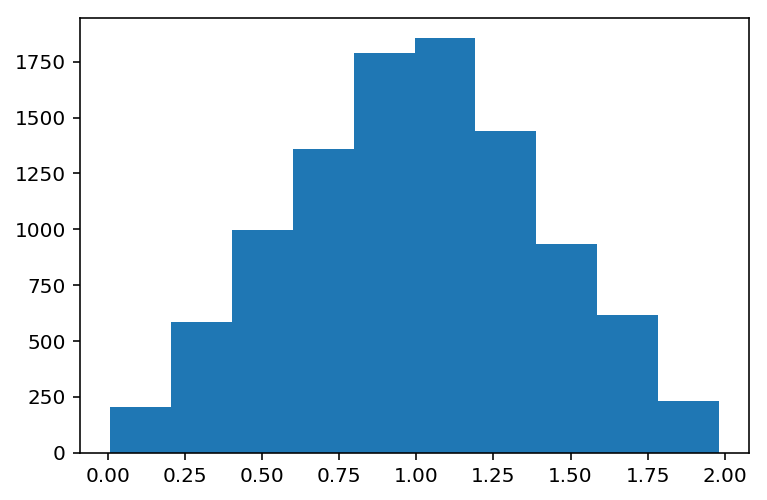

In [132]:
np.histogram(a_z)
plt.hist(a_z)

><b><big>Q</big>2.</b> Soient $X$ et $Y$ des variables aléatoires de loi exponentielle de paramètre 1, indépendantes. Illustrer, via un histogramme, le fait que $X+Y$ a pour densité $q(x) = x e^{−x} \mathbf{1}_{x \ge 0}$.

In [133]:
X = sps.expon(1)
Y = sps.expon(1)

(array([     0.,      0.,  26374.,  33009.,  20625.,  10743.,   5173.,
          2334.,    984.,    454.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

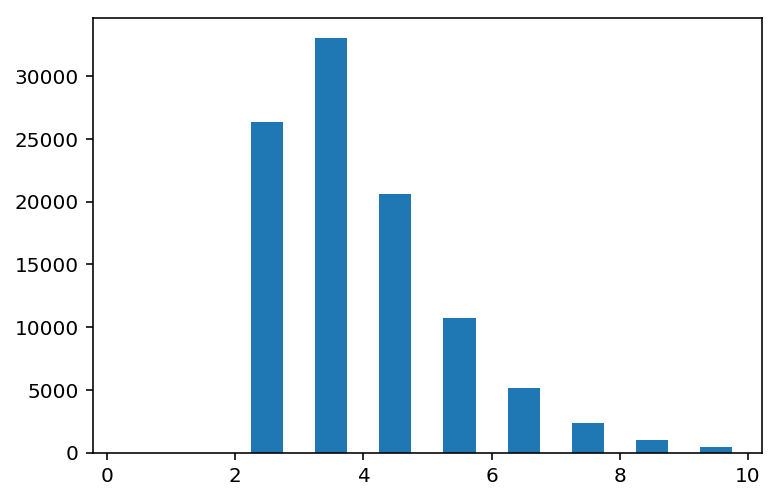

In [139]:
a_x = np.array(X.rvs(100000))
a_y = np.array(Y.rvs(100000))
a_z = []
for i in range(len(a_x)):
    a_z.append(a_x[i] + a_y[i])
# print(a_z)
np.histogram(a_z)
plt.hist(a_z, range=(0,10) ,histtype='bar', rwidth=0.5)

><b><big>Q</big>3.</b> Illustrer la propriété d’absence de mémoire des lois exponentielles : si $X$ suit une loi exponentielle, alors pour tout $t > 0$, la loi de $X − t$ sachant que $X > t$ est la loi de $X$ (c’est la raison pour laquelle on utilise ces lois pour modéliser les durées de vie de composants sans usure). Prendre par exemple un loi expontielle de paramètre $\lambda = 0.1$ et différentes valeurs de $t \in \{1, 10, 40\}$.

(array([ 264.,  171.,  161.,   98.,   57.,   55.,   39.,   20.,    9.,   12.]),
 array([  1. ,   4.9,   8.8,  12.7,  16.6,  20.5,  24.4,  28.3,  32.2,
         36.1,  40. ]),
 <a list of 10 Patch objects>)

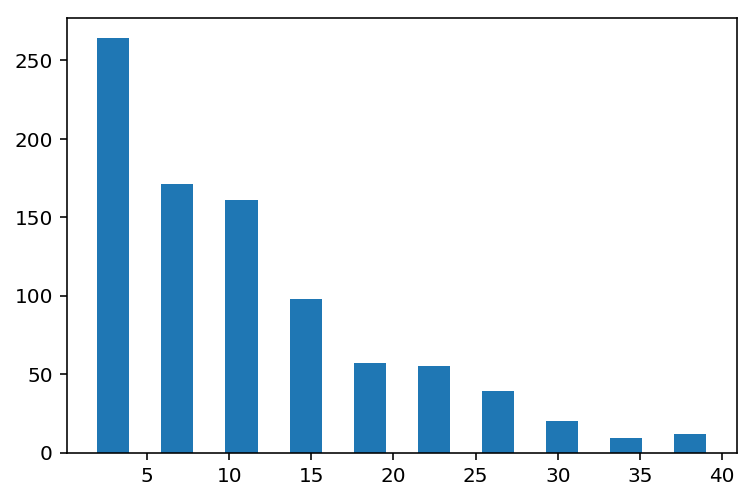

In [164]:
t = 10;
X = sps.expon(0,10)
A_x = X.rvs(1000)
A_x_t = [a_x for a_x in A_x if a_x > t]
plt.hist(A_x, range= (1, 40), rwidth=0.5)

In [166]:
A_x_t

[15.230306800760614,
 13.619973593625598,
 19.522038404015941,
 38.978437062604179,
 14.036066835696769,
 14.444390945204457,
 11.220318401723834,
 11.055412053256061,
 11.432343781546141,
 10.9128058933311,
 13.65682570636592,
 10.820751442580965,
 28.558364378369141,
 19.642668469396916,
 11.283351438264271,
 24.595065027914494,
 11.528767689581743,
 18.397485471478824,
 24.554556019584851,
 13.43758440458144,
 11.179324629319183,
 14.476396555266856,
 19.809271313705512,
 18.784685469516067,
 13.514218937341072,
 11.632385544045752,
 20.391062311145369,
 26.505049200775723,
 11.607681854531551,
 14.290797890656872,
 13.495111356049783,
 26.16966131806597,
 32.488337467678988,
 12.235548806219857,
 16.283402922645589,
 18.789004696296576,
 11.195842180158099,
 22.875101343696343,
 44.797342981451642,
 12.640630841861157,
 23.179329959578357,
 13.211389703738107,
 12.956686150884849,
 11.071232860488067,
 15.53231745879129,
 79.352309242777608,
 22.233561482716233,
 16.897561309230749

(array([ 144.,   85.,   62.,   49.,   26.,   17.,    9.,    8.,    3.,    3.]),
 array([ 10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,  42.,  46.,  50.]),
 <a list of 10 Patch objects>)

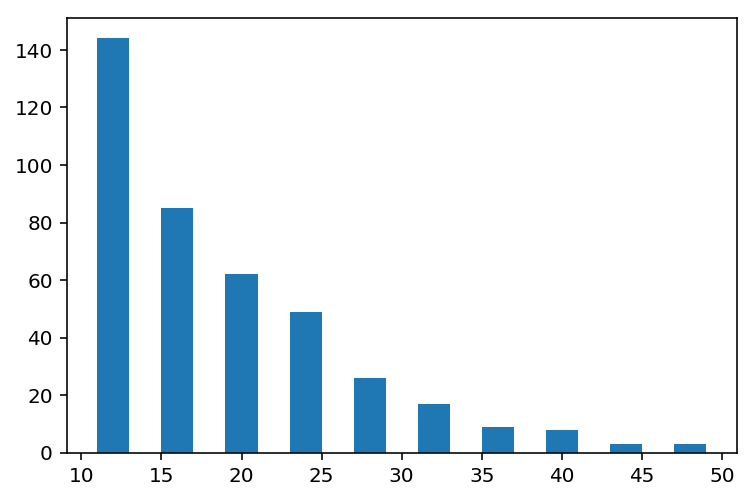

In [167]:
plt.hist(A_x_t, range = (10, 50), rwidth = 0.5)

# Illustration de la LFGN et du TCL

Soit $(X_n)_{n \ge 1}$ une suite de variables aléatoires _i.i.d._ de carré intégrable. On définit les suites $(m_n)_{n \ge 1}$ et $(\sigma_n^2)_{n \ge 2}$ (non définie pour $n = 1$) de la façon suivante
$$
    m_n = \frac{1}{n} \sum_{k=1}^n X_k \qquad \text{et} \qquad 
    \sigma_n^2 = \frac{1}{n-1} \sum_{k=1}^n (X_k - m_n)^2 \quad \text{pour} \; n \ge 2
$$
et on veut illustrer la Loi Forte des Grands Nombres et le Théorème Central Limite (étendu en utilisant le lemme de Slutsky pour remplacer $\sigma^2 = \mathrm{var}(X_1)$ par l'estimateur $\sigma_n^2$) c'est à dire les convergences
$$
    m_n \xrightarrow{p.s.} m \qquad \text{et} \qquad 
    \sqrt{n} \Bigl(\frac{m_n - m}{\sigma_n}\Bigr) \xrightarrow{\mathcal{L}} \mathcal{N}(0, 1).
$$
Plus précisément on constuit l'intervalle de confiance (asymptotique) à 95% à partir du TCL c'est à dire 
$$
    \text{pour $n$ grand} \quad \mathbf{P} \biggl( m \in \biggl[ m_n - \frac{1.96 \sigma_n}{\sqrt{n}} , m_n + \frac{1.96 \sigma_n}{\sqrt{n}} \biggr] \biggr) \simeq 0.95
$$

## Loi forte des grands nombres (LFGN)

><b><big>Q</big>1.</b> Soit $(X_n)_{n \ge 1}$ une suite _i.i.d._ de loi uniforme sur $[-4,8]$. Illustrer la convergence de la suite $m_n$ en fonction de $n$ (jusqu'à $N = 50,$ puis $200$). Ajouter sur ce graphe l'intervalle de confiance à 95% en fonction de $n$. Vous pourrez utiliser la fonction `plt.fill_between` pour colorier la zone de confiance.

In [182]:
sps.uniform?

In [183]:
X = sps.uniform(-4,12)

In [184]:
X.rvs(100)

array([ 5.60703843,  5.79596633, -2.00858066,  2.32277203, -3.1187045 ,
       -3.88905935,  0.64957017,  2.10139986,  5.57997763,  4.05336787,
       -2.66677721,  3.66724944, -3.51653925,  3.13760526,  5.73542578,
        4.12066758,  4.39792979,  2.30130209,  4.82019451, -0.66260356,
        4.17471374,  7.33142439, -1.99008685,  3.52858896, -1.31464987,
        1.23776795, -2.52652733, -2.819969  , -1.32048926, -1.17342758,
       -0.60771444,  5.10129989, -2.82754155, -3.01936056,  4.50832907,
        0.9415425 , -1.14232497,  3.98285899,  7.85413696,  0.31458014,
        1.25697699,  3.5357009 , -2.45182879,  6.86025866, -0.32631489,
        4.4171256 , -2.42110415,  6.57579743,  1.4868559 ,  7.30405972,
        6.54342691, -0.37648328,  6.22726432,  3.79662712, -3.02454482,
        0.08635279,  1.0018066 ,  0.85984412,  3.25055261,  6.79948048,
        0.24878321, -1.92692883,  0.05038122, -3.51439234, -3.00018141,
        2.30425066,  5.94650485,  6.92565029,  7.24217946, -3.36

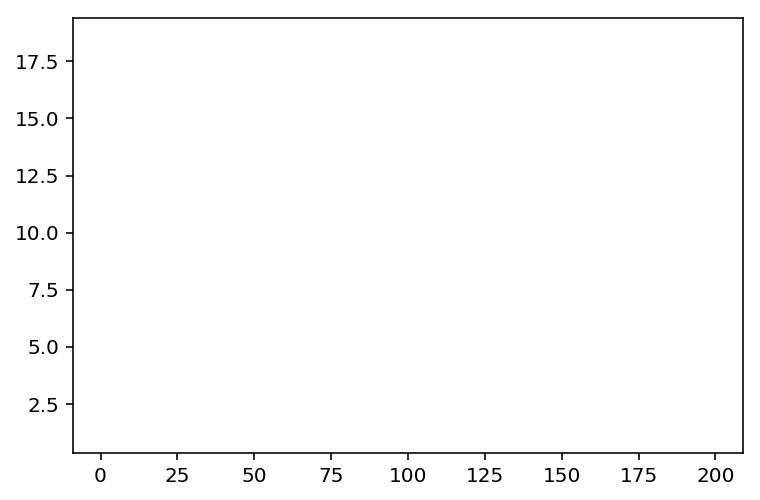

In [203]:
plt.fill_between(w, Lower, Upper)

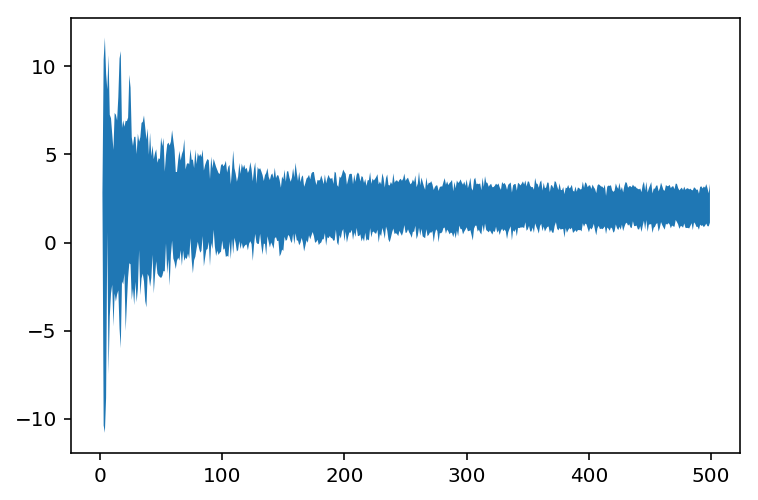

In [207]:
w = range(1,500)
Mean = []
Upper = []
Lower = []
for i in range(1,500):
    mean = np.mean(np.array(X.rvs(i)))
    var = np.var(np.array(X.rvs(i)))
    Upper.append(mean + 1.96 * var / np.sqrt(i))
    Lower.append(mean - 1.96 * var / np.sqrt(i))
    Mean.append(mean)
# plt.plot(w, Mean)
# print(w)
# print(Lower)
# print(Upper)
plt.fill_between(w, Lower, Upper)

## Théorème central limit (TCL)

><b><big>Q</big>2.</b> Représenter la répartition de l'erreur renormalisée $\displaystyle \sqrt{N} \Bigl(\frac{m_N - m}{\sigma_N}\Bigr)$ et la comparer à la densité d'une gaussienne centrée réduite. On utilisera un échantillon de cette erreur de taille $n = 100\,000$ pour $N = 10$ puis $N=100$.

(array([  1.,   4.,   9.,  18.,  28.,  27.,  30.,  16.,  12.,   3.]),
 array([-0.93110666, -0.76293914, -0.59477162, -0.42660411, -0.25843659,
        -0.09026907,  0.07789845,  0.24606596,  0.41423348,  0.582401  ,
         0.75056851]),
 <a list of 10 Patch objects>)

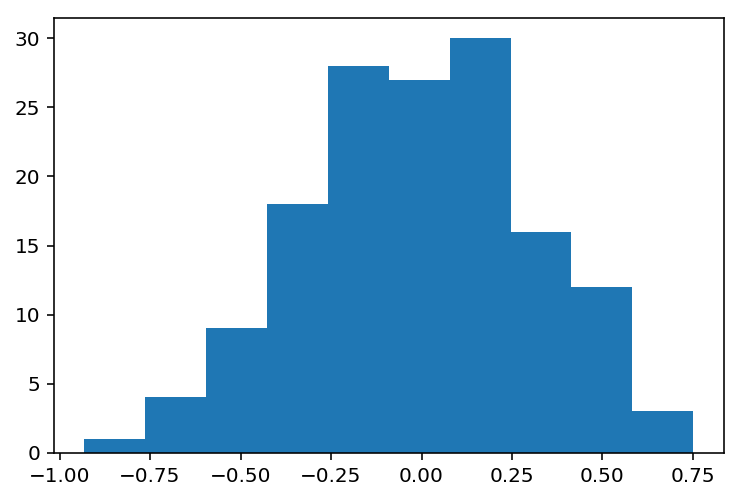

In [229]:
w = range(2,150)
m_s = X.mean();
Mean = []
Erreur_Norm = []
for i in range(2,150):
    mean = np.mean(np.array(X.rvs(i)))
    var = np.var(np.array(X.rvs(i)))
    Erreur_Norm.append(np.sqrt(i) * ((mean - m_s) / (var)))
    Mean.append(mean)
# plt.plot(w, Mean)
# print(w)
# print(Lower)
# print(Upper)
plt.hist(Erreur_Norm)

## Estimateur Monte Carlo

On va mettre en oeuvre un estimateur de Monte Carlo pour calculer 
$$
    I(\beta) = \mathbf{E} \bigl[\exp(\beta G)\bigr] \quad \text{où $G \sim \mathcal{N}(0,1)$ et $\beta \in \mathbf{R}$}. 
$$
La valeur exacte $I(\beta) = \exp(\beta^2/2)$ est connue mais cet exemple permet d'illustrer l'importance des bornes de l'intervalle de confiance (et donc de l'estimation de la variance) dans une méthode de Monte Carlo. La seule valeur moyenne $I_n = \frac{1}{n} \sum_{k=1}^n X_k$ n'est pas suffisante pour déterminer $I$. 

><b><big>Q</big>3.</b> Reproduire le tableau suivant où chaque colonne représente un résultat pour une valeur de $\beta \in \{0.2, 0.5, 1, 2, 3, 5\}$: la première ligne représente la valeur exacte, la ligne 2 la valeur moyenne $I_n$, la ligne 3 l'estimateur de la variance, et les lignes 4 et 5 sont les bornes inférieures et supérieurs de l'IC à 95%. Ce tableau est obtenu pour $n = 1\,000\,000$. Comment interpréter ce tableau?
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0.2</th>
      <th>0.5</th>
      <th>1.0</th>
      <th>2.0</th>
      <th>3.0</th>
      <th>5.0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Exact</th>
      <td>1.020201</td>
      <td>1.133148</td>
      <td>1.648721</td>
      <td>7.389056</td>
      <td>9.001713e+01</td>
      <td>2.683373e+05</td>
    </tr>
    <tr>
      <th>Mean</th>
      <td>1.020265</td>
      <td>1.133248</td>
      <td>1.648243</td>
      <td>7.345044</td>
      <td>8.611100e+01</td>
      <td>1.243426e+05</td>
    </tr>
    <tr>
      <th>Var</th>
      <td>0.042448</td>
      <td>0.363992</td>
      <td>4.628342</td>
      <td>2325.033622</td>
      <td>9.632487e+06</td>
      <td>1.388953e+15</td>
    </tr>
    <tr>
      <th>Lower</th>
      <td>1.019861</td>
      <td>1.132066</td>
      <td>1.644027</td>
      <td>7.250537</td>
      <td>8.002800e+01</td>
      <td>5.129734e+04</td>
    </tr>
    <tr>
      <th>Upper</th>
      <td>1.020668</td>
      <td>1.134431</td>
      <td>1.652460</td>
      <td>7.439550</td>
      <td>9.219399e+01</td>
      <td>1.973878e+05</td>
    </tr>
  </tbody>
</table>

# Structure de données, dictionnaires

Les dictionnaires sont très présents en python et il est important de savoir les manipuler. Un dictionnaire est tableau associatif c'est à dire un type de données associant à un ensemble de clefs $E$ un ensemble correspondant de valeurs $F$. Chaque clef est associée à une valeur: c'est une application surjective de $E$ dans $F$. 

Par exemple si on veut créer un dictionnaire qui contient des villes (les clefs) et qui renvoit le pays correspondant (la valeur), on pourra utiliser le code suivant:

In [ ]:
# on initialise un dictionnaire
d = { "Paris" : "France", "Londres" : "Angleterre", "Rome" : "Italie", "Marseille" : "France" }

In [ ]:
# on ajoute un couple clef-valeur
d["Lille"] = "France"

><b><big>Q</big>1.</b> A l'aide des méthodes `keys()`, `values()` et `items()` du dictionnaire `d`, produire l'affichage des clefs, des valeurs puis des clefs et valeurs. 
</div>

## Graphe et Matrice d'adjacence

Dans la suite un graphe est un graphe simple non orienté qui sera donné par un ensemble de sommets $E$ et à chaque sommet sera associé un ensemble de voisins (un sommet et un voisin forment un couple de $E \times E$ appelé arête). La matrice d'adjacence associée à un graphe a une valeur nulle si 2 sommets ne sont pas voisins et une valeur non nulle (ici 1) sinon.

<table style="width:100%">
    <tr style="text-align:center">
        <th>Représentation graphique du graphe</th>
        <th>Matrice d'adjacence associée</th>
    </tr>
    <tr></tr>
    <tr style="text-align:center">
        <th><img src=graph.png></th>
        <th>
$\begin{pmatrix}
 0 & 0 & 1 & 0 & 0 & 0\\
 0 & 0 & 1 & 0 & 1 & 0\\
 1 & 1 & 0 & 1 & 1 & 0\\
 0 & 0 & 1 & 0 & 0 & 0\\
 0 & 1 & 1 & 0 & 0 & 0\\
 0 & 0 & 0 & 0 & 0 & 0\\
\end{pmatrix}$
        </th>
    </tr>
</table>

On propose de représenter un graphe comme un dictionnaire dont une clef est un sommet et la valeur associée est la liste des voisins. Un graphe sera donc un `dict` de `list`. Voici par exemple le graphe $G$ correspondant à la représentation graphique ci-dessus.

In [ ]:
graph_G = { "A" : ["C"],
            "B" : ["C", "E"],
            "C" : ["A", "B", "D", "E"],
            "D" : ["C"],
            "E" : ["C", "B"],
            "F" : []
          } 
print(graph_G)

La matrice d'adjance associée peut être définie comme un `np.array` de dimension $6 \times 6$ et initialisée par le code suivant:

In [ ]:
mat_G = np.zeros(shape = (6,6))
mat_G[0, 2] = 1
mat_G[1, (2,4)] = 1
mat_G[2, (0,1,3,4)] = 1
mat_G[3, 2] = 1
mat_G[4, (2,1)] = 1
print(mat_G)

><b><big>Q</big>2.</b> Ecrire une fonction `adjmat_to_graph` qui à une matrice d'adjacence donnée renvoit le graphe associé. 

><b><big>Q</big>3.</b> Ecrire une fonction `graph_to_adjmat` qui réalise l'opération inverse: à un graphe stocké dans un `dict` de `list` renvoit sa une matrice d'adjacence. 

## Parcours en largeur d'un graphe

><b><big>Q</big>4.</b> Créer un graphe de taille `N = 20` tel que la probabilité d'avoir une arête entre 2 sommets est `p = 0.25`.

><b><big>Q</big>5.</b> Ecrire une fonction qui renvoit une `list` ou un `set` de tous les voisins à une distance inférieure à `k` (`k >= 0`) d'un sommet donné. Une distance de 0 doit renvoyer le sommet donné en entrée. 
Tester cette fonction sur un graphe creux généré dans la question précédente.

# Simulation d'une expérience aléatoire, chaîne de Markov

## Urnes d'Ehrenfest

On considère $d$ balles ($d > 1$) numérotées de 1 à $d$ et réparties initialement dans deux urnes $A$ et $B$. On note $E = \{1,\dots,d\}$ l'ensemble des balles et on s'intéresse à l'évolution du contenu des urnes après un nombre $n \ge 1$ de changements d'états. Un changement d'état est modélisé de la façon suivante: "_on tire un numéro de balle selon la loi uniforme sur $E$ et à un tirage $i$ on déplace la balle numéro $i$ d'une urne à l'autre_". Le contenu des urnes change au cours du temps et on note $A_n$ le contenu de $A$ à l'itération $n$. Ce modèle porte le nom d'_Urnes d'Ehrenfest_. 

Dans le programme de test on prendra $d = 20$ c'est à dire $E = \{1,\dots,20\}$ et le contenu initial $A_0 = \{1,\dots,10\}$. 

><b><big>Q</big>1.</b> En utilisant le type `list` initaliser les listes `E` et `A_0`, puis programmer l'évolution du contenu de l'urne pas à pas (par exemple en utilisant les méthodes `remove` et `append`). Afficher le résultat `A_n` et `B_n` après `n = 100` itérations.

><b><big>Q</big>2.</b> Reprendre la question précédente avec le type `set` et les méthodes associées: `add` et `remove`.

Cette construction itérative nécessaire dans des dynamiques plus complexes peut être améliorée de la façon suivante. Si on construit un vecteur `sample` des `n` réalisations de la loi uniforme sur $E$, on peut en déduire directement la composition des urnes à l'itération $n$. En effet la balle $i$ n'a pas changé d'urne entre 0 et $n$ si et seulement si le numéro $i$ apparait un nombre pair de fois dans `sample`.

><b><big>Q</big>3.</b> Construire directement `A_n` et `B_n` à partir d'un vecteur `sample` de taille `n` qui contient les réalisations de la loi uniforme sur $E$.

## Modélisation en tant que chaîne de Markov

On s'intéresse maintenant non plus à la composition de l'urne $A_n$ mais uniquement à sa taille. On note $X_n = \mathrm{Card}(A_n)$. L'évolution de $X_n$ se fait de la façon suivante: si l'urne $A_n$ contient $X_{n}$ balles alors la probabilité de tirer une balle présente dans $A_n$ est $\frac{X_{n}}{d}$. Ainsi avec probabilité $\frac{X_{n}}{d}$, $X_{n+1} = X_n - 1$ (car on déplace la balle dans l'urne $B$), et avec probabilité $\frac{d-X_n}{d}$ on a $X_{n+1} = X_n + 1$. La récurrence aléatoire suivante permet de construire une trajectoire $(X_0, \dots, X_n)$ 
$$
    \forall k \ge 0, \quad X_{k+1} = X_k + 1 - 2 \mathbf{1}_{ \left\{U_{k+1} < \frac{X_k}{d} \right\}}, \qquad X_0 \in \{0,\dots,d\},
$$
avec $(U_k)_{k \ge 1}$ une suite de variables aléatoires indépendantes de loi uniforme sur $[0,1]$.

><b><big>Q</big>4.</b> Ecrire une fonction `one_path` qui prend 2 arguments: un entier `X_0` (taille de $A_0$) et un `np.array` de taille `n` nommé `sample_U` qui contient les réalisations $(U_1, \dots, U_n)$ utilisées pour construire une trajectoire (path) totale $(X_0, \dots, X_n)$. La fonction `one_path` renvoit un `np.array` de taille `n+1` qui contient $(X_0, \dots, X_n)$.

><b><big>Q</big>5.</b> Représenter 5 trajectoires indépendantes $(X_0, \dots, X_n)$ avec $n = 50$ et $X_0 = 10$.

><b><big>Q</big>6.</b> Faire un échantillon de taille $N = 1000$ de réalisations de $X_n$ pour $n = 50$ et $X_0 = 10$. Représenter l'histogramme empirique (vous pouvez utiliser `plt.xticks(np.arange(0,d+1))` pour avoir une représentation bien lisible). Faire de même pour $n = 51$. Que constatez-vous ? Était-ce prévisible ? 

On modifie un peu la modélisation précédente en considérant la règle suivante: "_on tire un numéro de balle selon la loi uniforme sur $E$ et à un tirage $i$ on déplace la balle numéro $i$ d'une urne à l'autre **avec probabilité 1/2**_".

><b><big>Q</big>7.</b> Reprendre la question précédente avec ce nouveau modèle. <br />
On peut montrer que si $X_0 \sim B\bigl(d, \frac{1}{2}\bigr)$ (loi binomiale) alors $X_1 \sim B\bigl(d, \frac{1}{2}\bigr)$. 
Comparer cette loi binomiale avec l'histogramme empirique de la loi $X_n$ pour $n$ grand (par exemple $n = 100$, vous pouvez choisir $X_0$ fixé à 10).